In [1]:
from pydae.bmapu import bmapu_builder
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [2]:
data = {
"system":{"name":"smib","S_base":100e6, "K_p_agc":0.0,"K_i_agc":0.0,"K_xif":0.01},       
"buses":[{"name":"1", "P_W":0.0,"Q_var":0.0,"U_kV":20.0},
            {"name":"2", "P_W":0.0,"Q_var":0.0,"U_kV":20.0}
        ],
"lines":[{"bus_j":"1", "bus_k":"2", "X_pu":0.05,"R_pu":0.01,"Bs_pu":1e-6,"S_mva":100.0}],
"wecs":[
    {"type":"pmsm_1","bus":"1","S_n":1e6,
        "H_t":4.0,"H_r":1.0, "w_tr":5.0, "d_tr":0.01,
        "R_m":0.01,"L_m":0.05,"Phi_m":1.0,
        "R_s":0.01,"X_s":0.05,
        "K_pdc":0.1,"C_dc":0.5}],
"genapes":[{"bus":"2","S_n":1e9,"F_n":50.0,"X_v":0.001,"R_v":0.0,"K_delta":0.001,"K_alpha":1e-6}]
}

grid = bmapu_builder.bmapu(data)
#grid.checker()
grid.uz_jacs = True
grid.verbose = False
grid.build('wecs_test')

import wecs_test

model = wecs_test.model()


N = model.jac_ini.shape[0]
for it in range(N):
    print(it,model.jac_ini[it,:])



{'S_base': 100000000.0, 'g_1_2': 3.846153846153846, 'b_1_2': -19.23076923076923, 'bs_1_2': -5e-07, 'U_1_n': 20000.0, 'U_2_n': 20000.0, 'S_n_2': 1000000000.0, 'F_n_2': 50.0, 'X_v_2': 0.001, 'R_v_2': 0.0, 'K_delta_2': 0.001, 'K_alpha_2': 1e-06, 'K_rocov_2': 1e-06, 'S_n_1': 1000000.0, 'K_mppt3_1': 0.4, 'H_t_1': 4.0, 'H_r_1': 1.0, 'K_tr_1': 1579.1367041742974, 'D_tr_1': 19.844017075391882, 'R_m_1': 0.01, 'L_m_1': 0.05, 'Phi_m_1': 1.0, 'K_pdc_1': 0.1, 'R_s_1': 0.01, 'X_s_1': 0.05, 'C_dc_1': 0.5}
{'V_1': 1.0, 'theta_1': 0.0, 'V_2': 1.0, 'theta_2': 0.0, 'omega_coi': 1.0, 'omega_2': 1.0, 'theta_tr_1': 0.8, 'omega_t_1': 0.6, 'omega_r_1': 0.6, 'beta_1': 0.0, 'nu_w_1': 8.0, 'i_sr_1': 0.1, 'v_dc_1': 1.5}
0 [-1.00000000e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.14159265e+02
  0.00000000e+00  0.00000000e+00  0.

In [15]:
%matplotlib widget

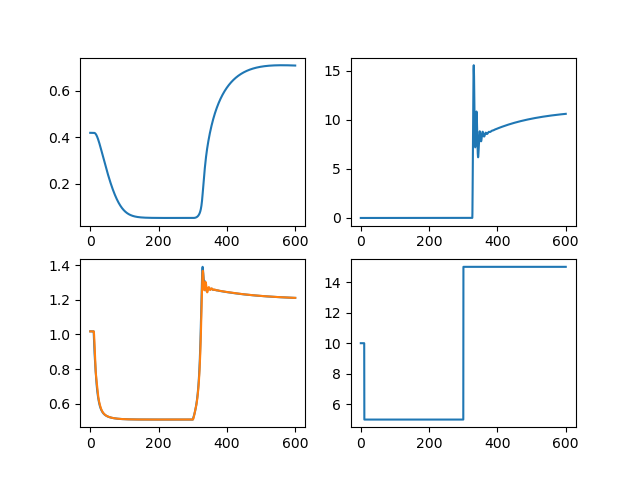

In [20]:
model = pmsm_test.model()
model.Dt = 0.01
params = {}
params.update({'nu_w_1':10,'T_beta_1':1.0,'K_tr_1':1.0,'D_tr_1':0.8})
model.ini(params,'xy_1.json')
model.run(10,{})
model.run(300,{'nu_w_1':5})
model.run(600,{'nu_w_1':15})
model.post();

fig,axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].plot(model.Time,model.get_values('p_s_1'))
axes[1,0].plot(model.Time,model.get_values('omega_t_1'))
axes[1,0].plot(model.Time,model.get_values('omega_r_1'))

axes[0,1].plot(model.Time,model.get_values('beta_1'))
axes[1,1].plot(model.Time,model.get_values('nu_w_1'))

In [2]:
for it in range(len(model.x_list)):
    print(it,grid.dae['f'][it])
for it in range(len(model.y_ini_list)):
    print(it,grid.dae['g'][it])

model.ini({},'xy_0.json')

0 6.28318530717959*F_n_2*(omega_2 - omega_coi) - K_delta_2*(delta_2 - delta_ref_2)
1 -Domega_2*K_alpha_2 + alpha_2
2 -Dv_2*K_rocov_2 + rocov_2
3 (0.4*omega_t_1**3 - p_w_mppt_lpf_1)*Piecewise((0.0, (omega_r_1 > 0.2) & (Abs(Dp_e_ref_1) > 0.01)), (1.0, True))/T_mppt_1
4 -1.0e-8*xi_beta_1 + Piecewise((0.0, Omega_t_b_1 - omega_r_1 > 0), (-Omega_t_b_1 + omega_r_1, True))
5 1.0*(K_i_beta_1*xi_beta_1 + K_p_beta_1*Piecewise((0.0, Omega_t_b_1 - omega_r_1 > 0), (-Omega_t_b_1 + omega_r_1, True)) - beta_1)/T_beta_1
6 -omega_r_1 + omega_t_1 - u_dummy_1
7 0.5*(-D_tr_1*(-omega_r_1 + omega_t_1) - K_tr_1*theta_tr_1 + K_pow_1*nu_w_1**3*(C_1_1*(C_2_1*(1/(Lam_b_1*Nu_w_b_1*omega_t_1/(Omega_t_b_1*nu_w_1) + 0.08*beta_1) - 0.035/(beta_1**3 + 1.0)) - C_3_1*beta_1 - C_4_1)*exp(-C_5_1*(1/(Lam_b_1*Nu_w_b_1*omega_t_1/(Omega_t_b_1*nu_w_1) + 0.08*beta_1) - 0.035/(beta_1**3 + 1.0))) + C_6_1*Lam_b_1*Nu_w_b_1*omega_t_1/(Omega_t_b_1*nu_w_1))/(C_p_b_1*Nu_w_b_1**3))/H_t_1
8 0.5*(D_tr_1*(-omega_r_1 + omega_t_1) + K_tr_1*the

True

In [3]:
N = model.jac_ini.shape[0]
for it in range(N):
    print(it,np.sum(np.abs(model.jac_ini[it,:])))


0 628.3195307179586
1 1e-06
2 1e-06
3 3.8484999762351615
4 1e-08
5 1.0
6 2.0
7 247.8144393540506
8 992.998431936897
9 0.41618006127809426
10 1.01
11 45.616287971963516
12 46.857581854892565
13 56.14090956670974
14 55.12293986956022
15 2.0
16 2.0010541858598456
17 2.001115001693905
18 2.060866903103201
19 2.116713838880216
20 10.979818191658726
21 1.4989909095829363
22 2.01
23 1.5089909095829364
24 2.2049492448966728
25 2.0
26 1.1
27 59.519401946721494
28 0.9938320391837676
29 1.06
30 2.06
31 1.775137199804312
32 4.946494193047144
33 59.54763166299544
34 59.192816201874315
35 2.0
36 1.0


In [4]:
params = {'nu_w_1':12,'Dp_e_ref_1':0.0,'A_l_1':0.001,'B_l_1':0.01,'C_l_1':0.01,'R_s_1':0.01,
          'K_p_beta_1':0, 'K_i_beta_1':0.0,'K_pdc_1':100,'v_dc_ref_1':1.4,
          #'i_dc_1':0.5,'p_m_ref_1':1,'p_w_1':0.2,'K_omega_r_1':100,
          'nu_w_1':8,
        #   'omega_r_ref_1':0,'K_i_beta_1':0.0,'K_p_beta_1':0.0,
        #   'K_w_mppt_1':0.0
          }

model.ini(params,'xy_1.json')
print(model.get_value('p_s_1'))
#model.save_xy_0('xy_1.json')
model.report_x()
model.report_y()
# model.report_z()


0.21491015082252782
delta_2 =  0.00
Domega_2 =  0.00
Dv_2  =  0.00
p_w_mppt_lpf_1 =  0.22
xi_beta_1 =  0.00
beta_1 =  0.00
theta_tr_1 =  0.00
omega_t_1 =  0.81
omega_r_1 =  0.81
v_dc_1 =  1.40
xi_freq =  0.00
V_1   =  1.00
theta_1 =  0.00
V_2   =  1.00
theta_2 =  0.00
omega_2 =  1.00
i_d_2 =  0.00
i_q_2 = -0.00
p_s_2 = -0.00
q_s_2 =  0.00
i_mq_ref_1 =  0.27
v_md_1 = -0.01
v_mq_1 =  0.81
i_md_1 = -0.00
i_mq_1 =  0.27
tau_r_1 =  0.27
p_s_ref_1 =  0.21
i_sd_ref_1 =  0.00
i_sq_ref_1 =  0.21
v_td_ref_1 =  0.01
v_tq_ref_1 =  1.00
i_si_1 =  0.00
i_sr_1 =  0.21
p_s_1 =  0.21
q_s_1 =  0.00
omega_coi =  1.00
p_agc =  0.00


In [5]:
# params.pop('i_dc_1')
# params.pop('p_m_ref_1')
# params.pop('p_w_1')
for K_w_mppt_1 in np.linspace(0.09,0.11,10):
    params.update({'K_w_mppt_1':K_w_mppt_1,'nu_w_1':5})

    model.ini(params,'xy_0.json')
    print(K_w_mppt_1,model.get_value('p_s_1'))

Input or parameter K_w_mppt_1 not found.
0.09 0.05261781193135806
Input or parameter K_w_mppt_1 not found.
0.09222222222222222 0.052617811931358054
Input or parameter K_w_mppt_1 not found.
0.09444444444444444 0.052617811931358026
Input or parameter K_w_mppt_1 not found.
0.09666666666666666 0.052617811931358026
Input or parameter K_w_mppt_1 not found.
0.09888888888888889 0.05261781193135805
Input or parameter K_w_mppt_1 not found.
0.10111111111111111 0.05261781193135805
Input or parameter K_w_mppt_1 not found.
0.10333333333333333 0.05261781193135804
Input or parameter K_w_mppt_1 not found.
0.10555555555555556 0.05261781193135803
Input or parameter K_w_mppt_1 not found.
0.10777777777777778 0.05261781193135803
Input or parameter K_w_mppt_1 not found.
0.11 0.05261781193135804


In [6]:
model.report_params()

S_base =100000000.00
g_1_2 = 3.85
b_1_2 =-19.23
bs_1_2 =-0.00
U_1_n =20000.00
U_2_n =20000.00
S_n_2 =1000000000.00
F_n_2 =50.00
X_v_2 = 0.00
R_v_2 = 0.00
K_delta_2 = 0.00
K_alpha_2 = 0.00
K_rocov_2 = 0.00
S_n_1 =1000000.00
H_t_1 = 4.00
H_r_1 = 1.00
K_tr_1 =1579.14
D_tr_1 =198.44
R_m_1 = 0.01
L_m_1 = 0.05
Phi_m_1 = 1.00
K_pdc_1 =100.00
R_s_1 = 0.01
X_s_1 = 0.05
C_dc_1 = 0.50
A_l_1 = 0.00
B_l_1 = 0.01
C_l_1 = 0.01
C_1_1 = 0.52
C_2_1 =116.00
C_3_1 = 0.40
C_4_1 = 5.00
C_5_1 =21.00
C_6_1 = 0.01
Nu_w_b_1 =12.00
Lam_b_1 = 8.10
Omega_t_b_1 = 1.20
K_pow_1 = 0.73
C_p_b_1 = 0.48
T_beta_1 = 2.00
K_p_beta_1 = 0.00
K_i_beta_1 = 0.00
T_mppt_1 = 5.00
K_p_agc = 0.00
K_i_agc = 0.00
K_xif = 0.01


In [7]:
import numpy as np
def mppt_omega_p(omega_t):
    
    C_1 = 0.5176
    C_2 = 116
    C_3 = 0.4
    C_4 = 5.0
    C_5 = 21 
    C_6 = 0.0068
    Nu_w_b = 12
    Lam_b = 8.1
    Omega_t_b = 1.2
    K_pow = 0.73

    beta_b = 0.0
    lam = Lam_b
    inv_lam_i =  1/(lam + 0.08*beta_b) - 0.035/(beta_b**3 + 1.0)   
    C_p_b = C_1*(C_2*inv_lam_i - C_3*beta_b - C_4)*np.exp(-C_5*inv_lam_i) + C_6*lam 
    
    ## MPPT
    Lam_opt = Lam_b
    beta_mppt = 0.0
    nu_w_mppt = Nu_w_b*(omega_t/Omega_t_b)   
    inv_lam_i_mppt =  1/(Lam_opt) - 0.035   
    c_p_mppt = C_1*(C_2*inv_lam_i_mppt - C_4)*np.exp(-C_5*inv_lam_i_mppt) + C_6*Lam_opt 
    c_p_mppt_pu = c_p_mppt/C_p_b # (pu)
    p_w_mppt_ref = K_pow*c_p_mppt_pu*(nu_w_mppt/Nu_w_b)**3
    omega_r_th = 0.2
    # test_1 = (np.abs(Dp_e_ref)>0.01) & (omega_r>omega_r_th)
    # p_w_mppt = sym.Piecewise((p_w_mppt_lpf,test_1), (p_w_mppt_ref,True))
    # K_mppt = sym.Piecewise((0.0,test_1), (1.0,True))
    # Dp_e = sym.Piecewise((Dp_e_ref,test_1), (Dp_e_ref * (1 + 50*(omega_r - omega_r_th)),True))
    # p_w_mmpt_ref = p_w_mppt_lpf #+ Dp_e   test

    return p_w_mppt_ref

In [8]:
omega_t_pu = np.linspace(0,1)
p_mppt = mppt_omega_p(omega_t_pu)

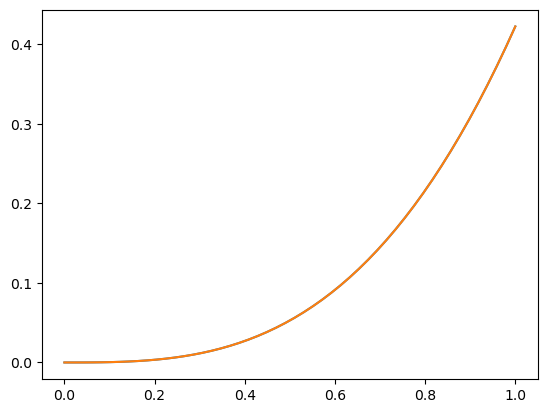

In [9]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots()
axes.plot(omega_t_pu,p_mppt)
axes.plot(omega_t_pu,4.22453704e-01*omega_t_pu**3)





In [10]:
Nu_w = np.linspace(0.0,14,10)
P_s = Nu_w.copy() 

for it,nu_w in enumerate(np.linspace(5.0,13,10)):
    params.update({'nu_w_1':nu_w,'K_p_beta_1':0.1, 'K_i_beta_1':0.01})

    model.ini(params,'xy_1.json')
    P_s[it] = model.get_value('p_s_1')


Input or parameter K_w_mppt_1 not found.
Input or parameter K_w_mppt_1 not found.
Input or parameter K_w_mppt_1 not found.
Input or parameter K_w_mppt_1 not found.
Input or parameter K_w_mppt_1 not found.
Input or parameter K_w_mppt_1 not found.
Input or parameter K_w_mppt_1 not found.
Input or parameter K_w_mppt_1 not found.
Input or parameter K_w_mppt_1 not found.
Input or parameter K_w_mppt_1 not found.


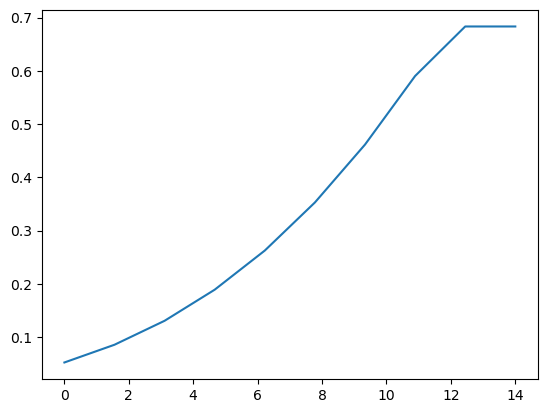

In [11]:
fig,axes = plt.subplots()
axes.plot(Nu_w,P_s)


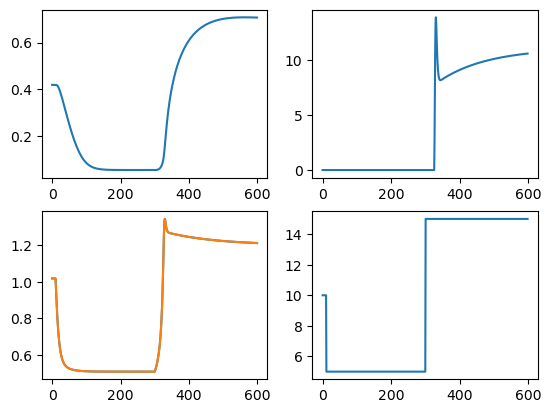

In [38]:
params

{'nu_w_1': 8,
 'Dp_e_ref_1': 0.0,
 'A_l_1': 0.001,
 'B_l_1': 0.01,
 'C_l_1': 0.01,
 'R_s_1': 0.01,
 'K_p_beta_1': 0,
 'K_i_beta_1': 0.0,
 'K_pdc_1': 100,
 'v_dc_ref_1': 1.4,
 'i_dc_1': 0.5,
 'p_m_ref_1': 1,
 'p_w_1': 0.2,
 'K_omega_r_1': 100,
 'nu_w': 14.0}